In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Select target country
target_country = 'Indonesia'

# Read the CSV File for the target country
file_path = os.path.join(os.getcwd(), f"clean_data/master_dataset_{target_country}.csv")  # Define the file path
train_data = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
input_train_data = train_data[['Year', 'total_co2_emissions', 'sea_level_rise', 'average_extreme_events']]
output_train_data = train_data[['avg_global_temp']]
print(input_train_data.shape)
print(output_train_data.shape)

# Select target country
test_country = 'Argentina'

# Read the CSV File for the target country
file_path = os.path.join(os.getcwd(), f"clean_data/master_dataset_{test_country}.csv")  # Define the file path
test_data = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
input_test_data = test_data[['Year', 'total_co2_emissions', 'sea_level_rise', 'average_extreme_events']]
output_test_data = test_data[['avg_global_temp']]
print(input_train_data.shape)
print(output_train_data.shape)

(22, 4)
(22, 1)
(22, 4)
(22, 1)


In [3]:
num_years_train = train_data['Year'].nunique() # Batch size
num_years_test = test_data['Year'].nunique() # Batch size
print(f"{num_years_train}\n{num_years_test}")

22
22


In [4]:
def temp_loss(X, Y, nnet):
  """
  Args:
    X: Num_years x 4 with dimensions of co2, sea level rise, and extreme weather (for given year)
    Y: N_batch x 
  Returns:
    loss: scalar of mse_regression_loss batch
  """
  nnet_output = nnet(X)

  # mse_loss should be a mean of the squared error of the
  mse_loss = tf.reduce_mean(tf.square(nnet_output - Y)) # Linear squared error calculation
  return mse_loss

def grad(X, Y, nnet):
  with tf.GradientTape() as tape:
    loss_value = temp_loss(X, Y, nnet)

  return tape.gradient(loss_value, nnet.weights)

In [10]:
nnet = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_years_train, activation='relu') # Linear output layer
]) # Model with 2 hidden layers with 256 hidden units each (relu activation)
nnet.build([num_years_train, 4]) # Use downsampled image as input
nnet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (22, 32)               │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (22, 32)               │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (22, 22)               │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,942 (7.59 KB)

 Trainable params: 1,942 (7.59 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# nepochs = number of times to run through the data.
nepochs = 1000  # Could probably do better with more epochs, but should suffice

for i in range(nepochs):
  grads = grad(input_train_data, output_train_data, nnet)
  optimizer.apply_gradients(zip(grads, nnet.weights))  # SGD-type update (w/ Adam)
  print("Loss at step {:03d}: {:.3f}".format(
      i, temp_loss(input_train_data, output_train_data, nnet)))

Loss at step 000: 32332.520
Loss at step 001: 31994.330
Loss at step 002: 31662.086
Loss at step 003: 31336.328
Loss at step 004: 31014.762
Loss at step 005: 30696.500
Loss at step 006: 30381.012
Loss at step 007: 30068.330
Loss at step 008: 29758.715
Loss at step 009: 29452.607
Loss at step 010: 29151.023
Loss at step 011: 28856.301
Loss at step 012: 28569.002
Loss at step 013: 28285.967
Loss at step 014: 28006.527
Loss at step 015: 27729.857
Loss at step 016: 27455.992
Loss at step 017: 27185.082
Loss at step 018: 26917.141
Loss at step 019: 26652.887
Loss at step 020: 26393.062
Loss at step 021: 26136.943
Loss at step 022: 25883.736
Loss at step 023: 25633.361
Loss at step 024: 25385.539
Loss at step 025: 25140.219
Loss at step 026: 24897.381
Loss at step 027: 24657.025
Loss at step 028: 24419.131
Loss at step 029: 24183.686
Loss at step 030: 23950.678
Loss at step 031: 23720.078
Loss at step 032: 23491.877
Loss at step 033: 23266.045
Loss at step 034: 23042.570
Loss at step 035: 22

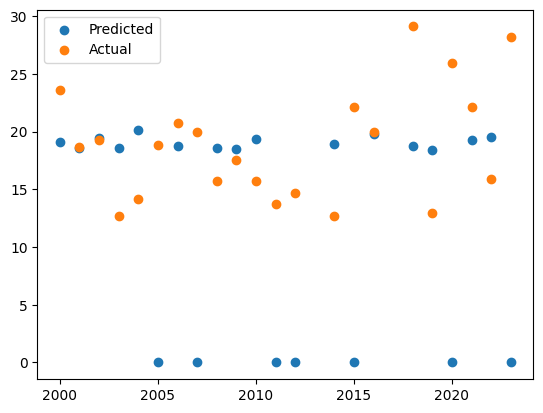

In [ ]:
nnet_output_pred = nnet(input_train_data)

plt.scatter(input_train_data['Year'], nnet_output_pred[0], label="Predicted")
plt.scatter(input_train_data['Year'], output_train_data, label="Actual")
plt.legend()

In [ ]:
# One output for average temperature for each year considered
output_size = num_years_train

nnet = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(input_train_data.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='relu') # Linear output layer
]) # Model with 2 hidden layers with 256 hidden units each (relu activation)
nnet.summary()    

In [ ]:
nnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss=temp_loss, # Use binary cross entropy loss for binary classification (all arguements optional)
    metrics=['mae']
) # Use Binary accuracy as metric

In [ ]:
nnet.fit(input_train_data, output_train_data, epochs=100)

plt.scatter(X[np.equal(Y[:,-1], 0), 0], X[np.equal(Y[:,-1], 0), 1])
plt.scatter(X[np.equal(Y[:,-1], 1), 0], X[np.equal(Y[:,-1], 1), 1], marker='+')